# Global Trends in Mental Health Disorder

**Mayank Pujara |** mayankpujara25@gmail.com<br><br>
**Batch: SB-24-1-1 NLI**

---
This notebook is a multifaceted approach is employed to gain insights into global mental health disparities. A detailed data visualization compares the prevalence of key mental health disorders—depression, anxiety, bipolar disorder, schizophrenia, eating disorders, alcohol use disorder, and drug use disorder—across diverse countries. This illuminates global variations and potential factors influencing mental health on a broader scale.<br><br>
Furthermore, leveraging this dataset as part of a larger machine learning initiative, predictive models are crafted for mental health across countries or regions. Incorporating demographics, economic indicators, and other variables, these models contribute to understanding population susceptibility to specific disorders, offering a foundation for crafting tailored preventive strategies on a global scale.

----

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## 2. Loading the Dataset

In [2]:
dataset = pd.read_csv("Global Trends in Mental Health Disorder Dataset.csv")
print("Successfully loaded the dataset")

Successfully loaded the dataset


C:\Users\Mayank Pujara\AppData\Local\Temp\ipykernel_10324\498609350.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Global Trends in Mental Health Disorder Dataset.csv")


## 3. Exploring the Data

In [3]:
dataset.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
dataset.columns.tolist()

['index',
 'Entity',
 'Code',
 'Year',
 'Schizophrenia (%)',
 'Bipolar disorder (%)',
 'Eating disorders (%)',
 'Anxiety disorders (%)',
 'Drug use disorders (%)',
 'Depression (%)',
 'Alcohol use disorders (%)']

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


In [6]:
dataset.shape

(108553, 11)

In [7]:
dataset.describe()

,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867834
max,108552.000000,8.967330,3.452476,6.602754,5.474668


### • Data Cleaning & Preprocessing

In [8]:
print(pd.isnull(dataset).sum())

index                             0
Entity                            0
Code                           5412
Year                              0
Schizophrenia (%)             82678
Bipolar disorder (%)          89147
Eating disorders (%)           8317
Anxiety disorders (%)        102085
Drug use disorders (%)       102085
Depression (%)               102085
Alcohol use disorders (%)    102085
dtype: int64


In [9]:
missing_values_columns = ['Code', 'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']
dataset.dropna(subset = missing_values_columns, inplace = True)
print(pd.isnull(dataset).sum())

index                        0
Entity                       0
Code                         0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Drug use disorders (%)       0
Depression (%)               0
Alcohol use disorders (%)    0
dtype: int64


In [10]:
numeric_columns = ['Year', 'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors = 'coerce')
dataset.reset_index(drop=True, inplace=True)
dataset

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
5483,6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
5484,6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
5485,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
5486,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


### • Temporal Analysis

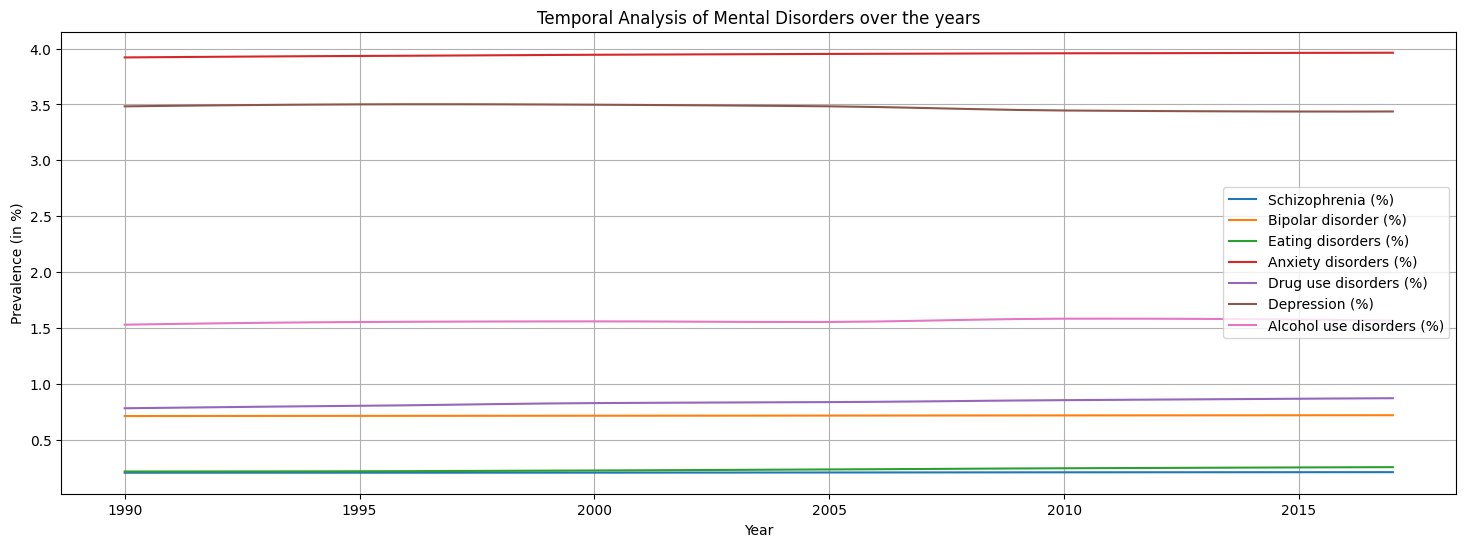

In [11]:
interested_columns = ['Year', 'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']
selected_data = dataset[interested_columns]
yearly_mean = selected_data.groupby('Year').mean()

plt.figure(figsize = (18,6))
for column in yearly_mean.columns:
    plt.plot(yearly_mean.index, yearly_mean[column], label = column)
plt.xlabel('Year')
plt.ylabel('Prevalence (in %)')
plt.title('Temporal Analysis of Mental Disorders over the years')
plt.legend()
plt.grid(True)
plt.show()

### Exploring the global prevalence of various mental health conditions across different countries.

C:\Users\Mayank Pujara\AppData\Local\Temp\ipykernel_10324\2189478261.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


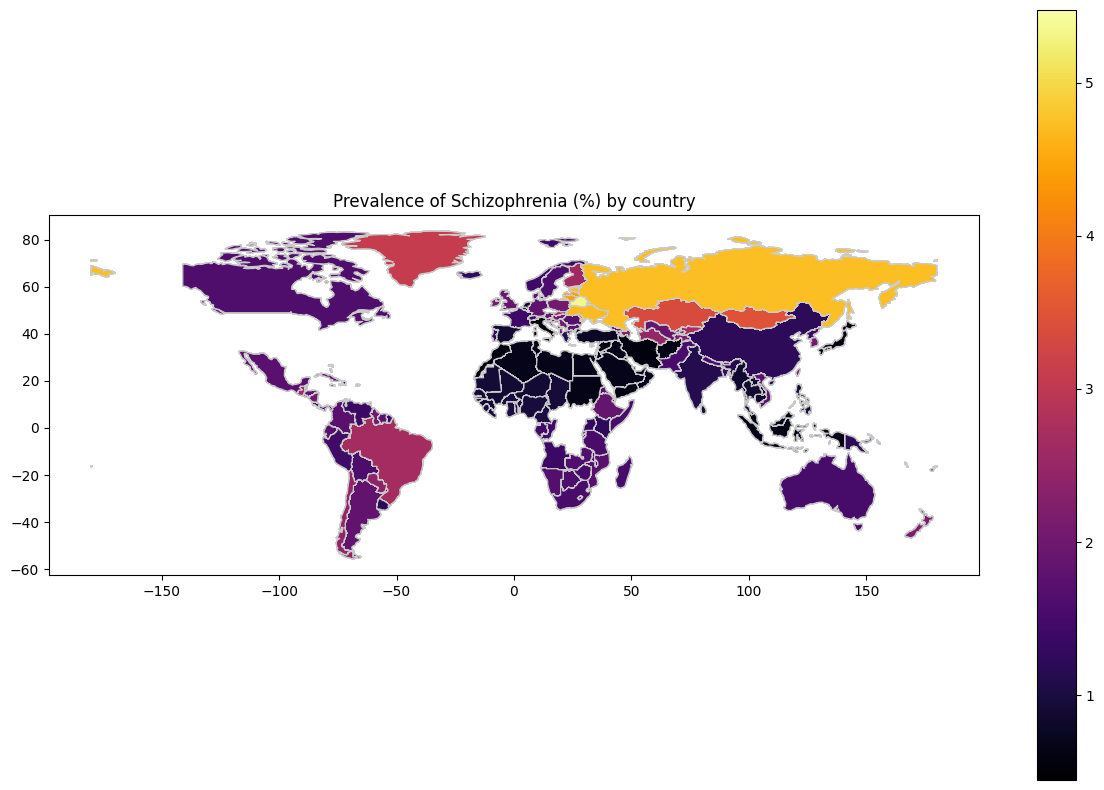

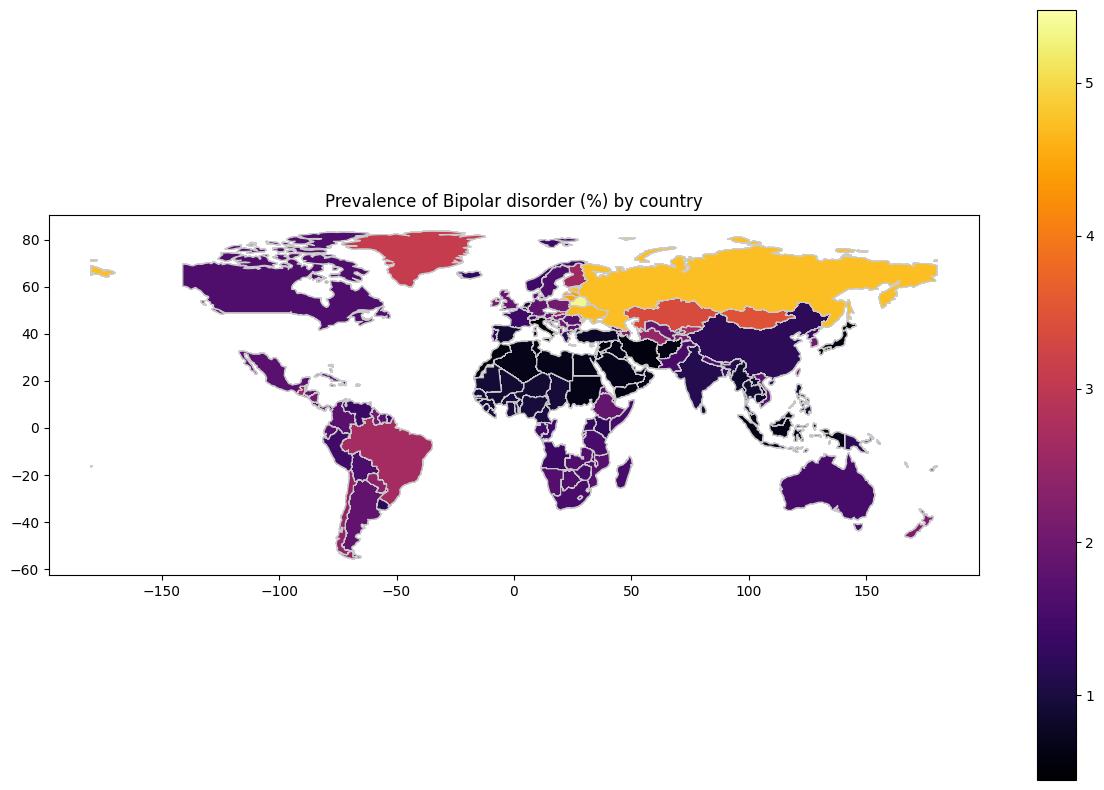

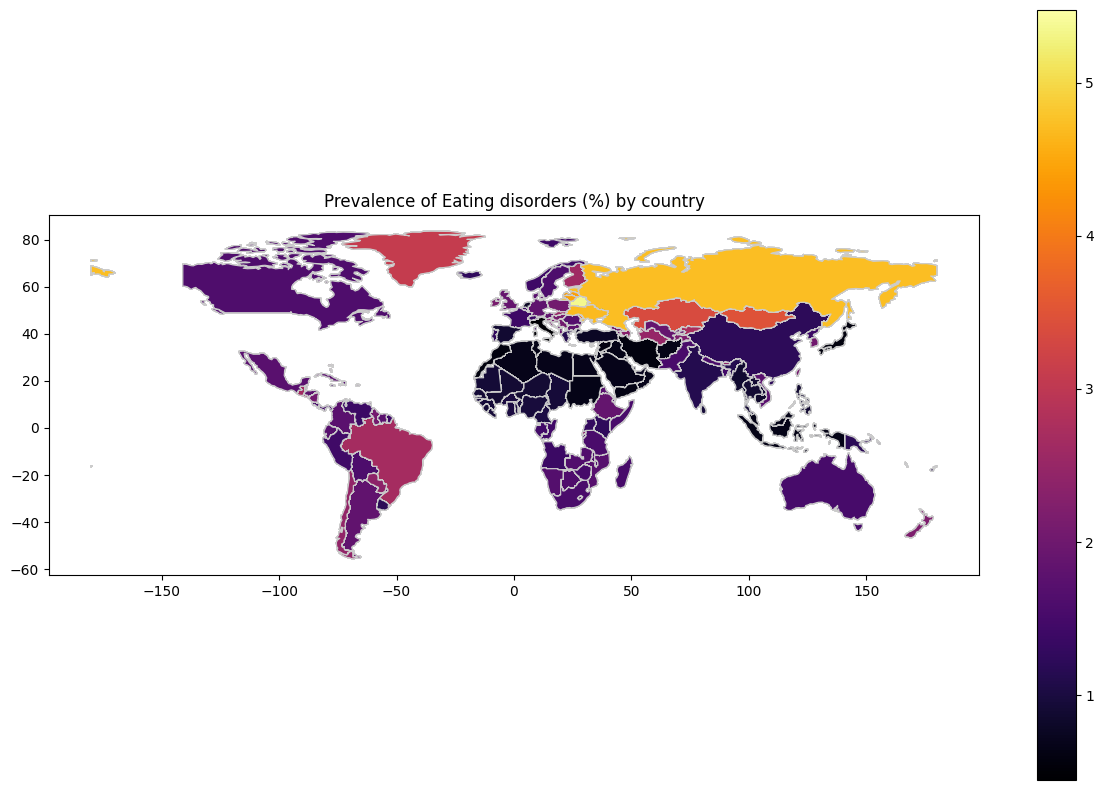

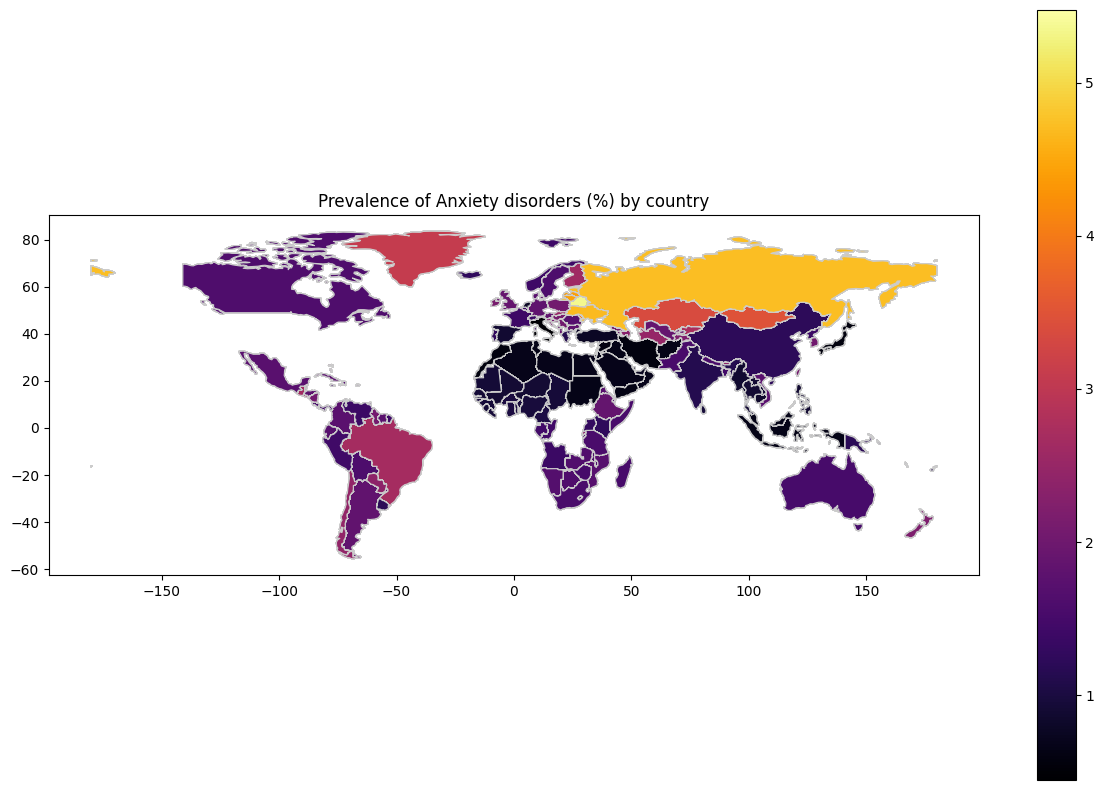

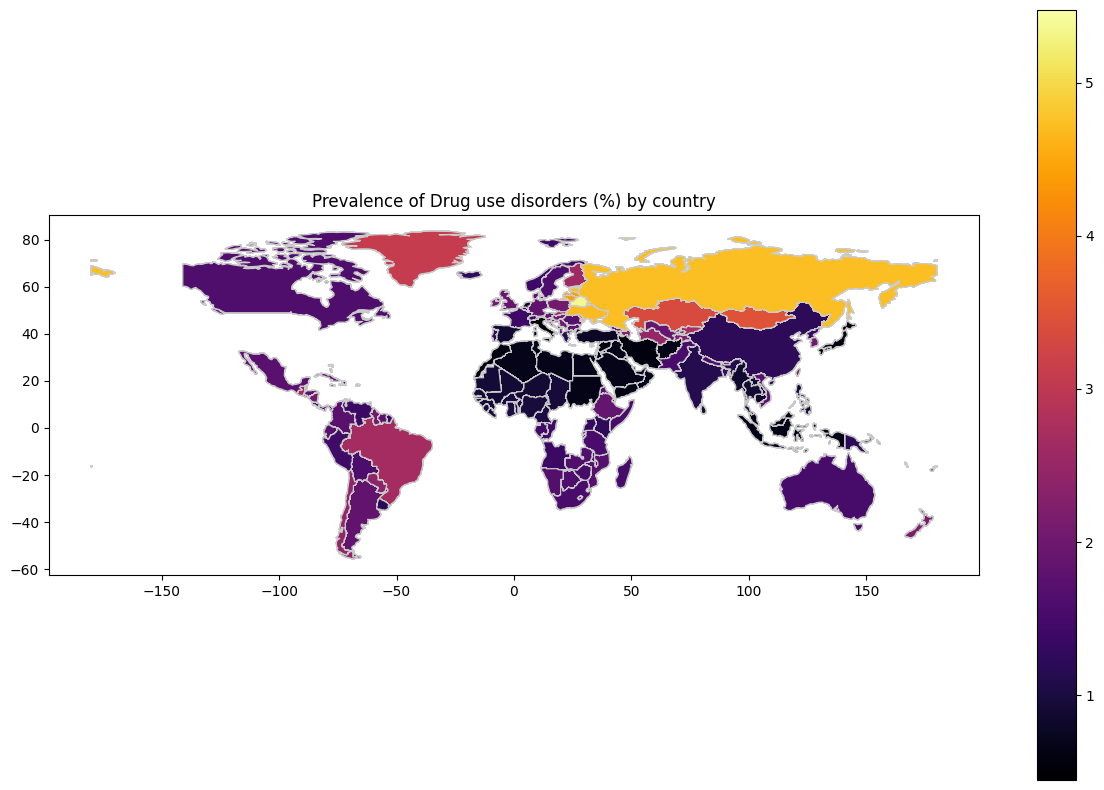

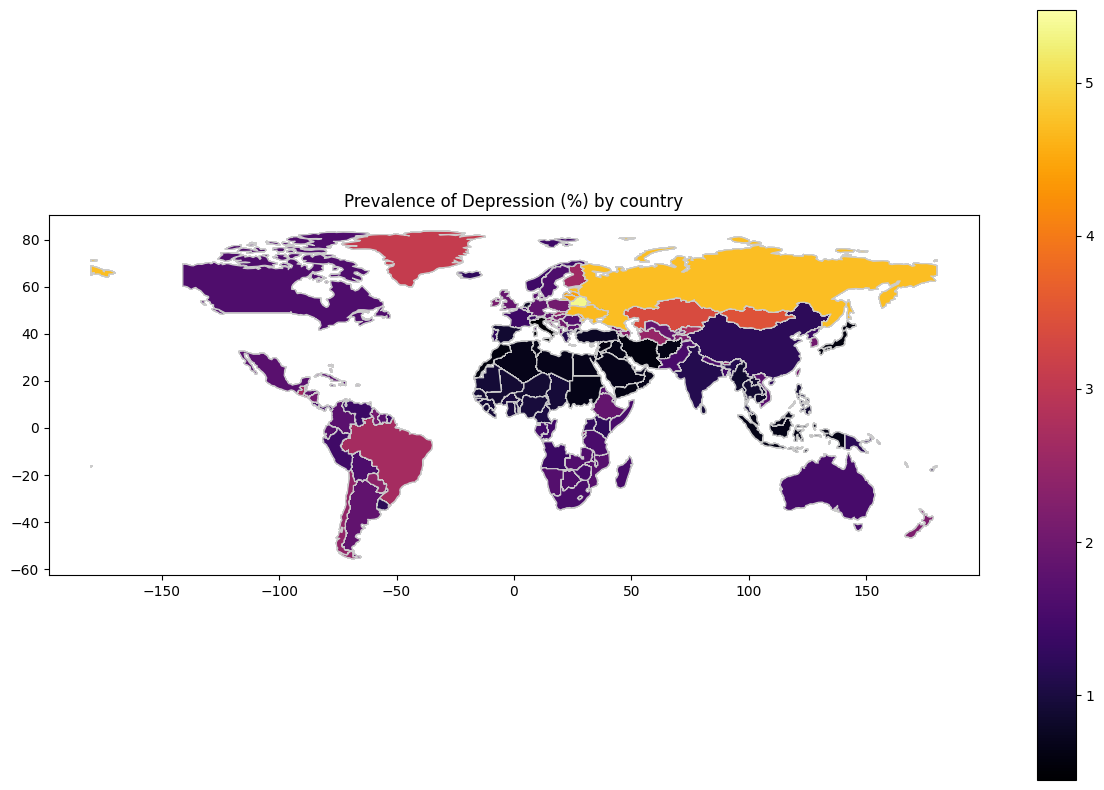

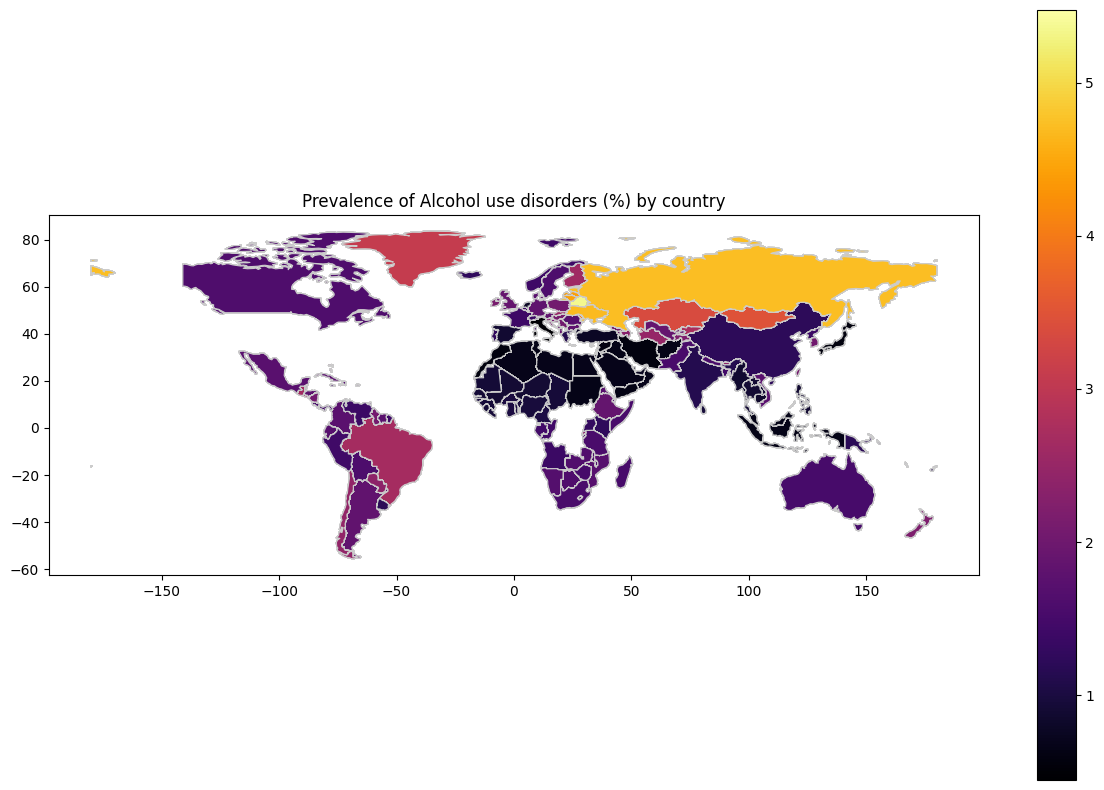

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

mental_health_disorders = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']

for disorder in mental_health_disorders:
    merged_data = world.set_index('name').join(dataset.set_index('Entity'))
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(column=column, cmap='inferno', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Prevalence of {disorder} by country')

    plt.show()


for disorder in mental_health_disorders:
    m = folium.Map(location=[0, 0], zoom_start=1)

    folium.Choropleth(
        geo_data=world,
        name='choropleth',
        data=dataset,
        columns=['Entity', disorder],
        key_on='feature.properties.name',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Prevalence of {disorder}'
    ).add_to(m)

### • Correlation between the mental disorders

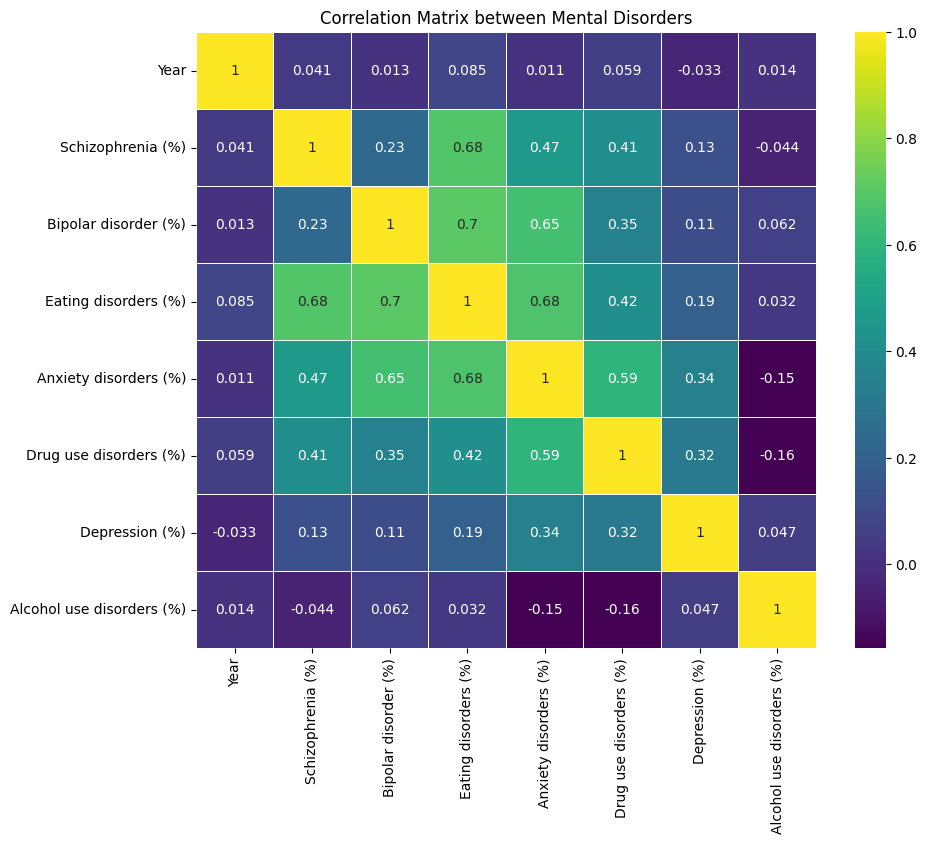

In [13]:
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", linewidths=0.5)
plt.title("Correlation Matrix between Mental Disorders")
plt.show()

- **Schizophrenia:** There is a weak positive correlation between Schizophrenia and Bipolar Disorder (0.23), Anxiety Disorders (0.47), and Eating Disorders (0.68). This means that countries with higher percentages of Schizophrenia tend to also have slightly higher percentages of these other disorders, but the correlation is not very strong.
- **Bipolar Disorder:** There is a moderate positive correlation between Bipolar Disorder and Eating Disorders (0.70) and Anxiety Disorders (0.65). This suggests a stronger relationship between these disorders compared to Schizophrenia.
- **Eating Disorders:** Eating Disorders show a moderate positive correlation with most other disorders, with the strongest being with Anxiety Disorders (0.68).
- **Anxiety Disorders:** Anxiety Disorders show moderate positive correlations with most other disorders, with the strongest being with Eating Disorders (0.68) and Bipolar Disorder (0.65).
- **Drug Use Disorders:** Drug Use Disorders show a weak positive correlation with most other disorders, with the strongest being with Anxiety Disorders (0.59).
- **Depression:** Depression shows weak positive correlations with most other disorders, with the strongest being with Anxiety Disorders (0.34).
- **Alcohol Use Disorders:** There is a very weak positive correlation between Alcohol Use Disorders and Schizophrenia (-0.044) and a weak negative correlation with most other disorders, with the strongest being with Anxiety Disorders (-0.15).

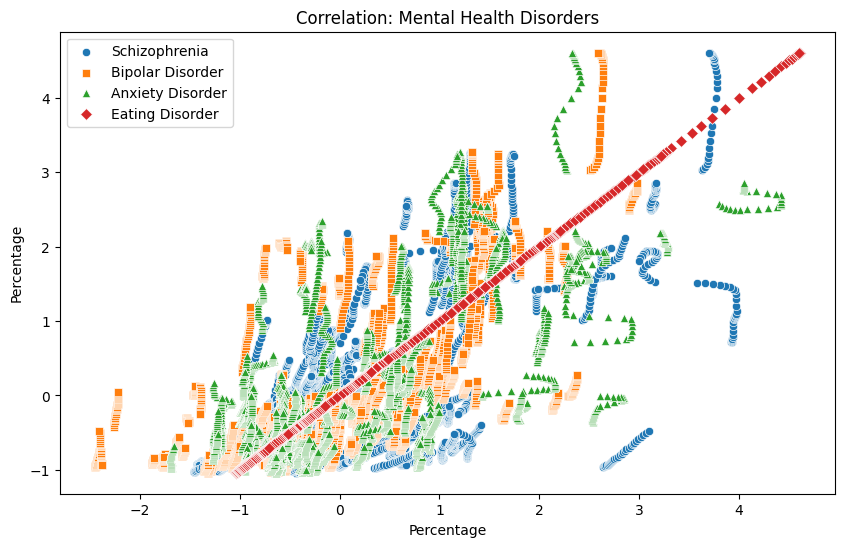

In [14]:
from sklearn.preprocessing import StandardScaler

relevant_columns = dataset[['Schizophrenia (%)','Bipolar disorder (%)','Anxiety disorders (%)', 'Eating disorders (%)']]

scaler = StandardScaler()
columns_scaled = pd.DataFrame(scaler.fit_transform(relevant_columns), columns=relevant_columns.columns)


plt.figure(figsize=(10, 6))

# Scatter plot for all disorders on the same plot
sns.scatterplot(x='Schizophrenia (%)', y='Eating disorders (%)', data=columns_scaled, label='Schizophrenia', marker='o')
sns.scatterplot(x='Bipolar disorder (%)', y='Eating disorders (%)', data=columns_scaled, label='Bipolar Disorder', marker='s')
sns.scatterplot(x='Anxiety disorders (%)', y='Eating disorders (%)', data=columns_scaled, label='Anxiety Disorder', marker='^')
sns.scatterplot(x='Eating disorders (%)', y='Eating disorders (%)', data=columns_scaled, label='Eating Disorder', marker='D')

plt.title('Correlation: Mental Health Disorders')
plt.xlabel('Percentage')
plt.ylabel('Percentage')
plt.legend()

plt.show()

## 4. Predictive Modelling

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
features = ['Year', 'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Alcohol use disorders (%)']
X = dataset[features]
y = dataset['Depression (%)']

### • Splitting the dataset into Training and Testing data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4390, 7), (1098, 7))

In [18]:
# Function to evaluate the model's performance
def evaluate_model_performance(true_value, predicted_value):
    mean_absolute_err = mean_absolute_error(true_value, predicted_value)
    root_mean_squared_err = np.sqrt(mean_squared_error(true_value, predicted_value))
    r2score = r2_score(true_value, predicted_value)
    return mean_absolute_err, root_mean_squared_err, r2score

In [19]:
models = {
    "Linear Regressions": LinearRegression(),
    "K Nearest Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

model_list = []
r2_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Evaluating the model's performance
    model_MAE, model_RMSE, model_R2_score = evaluate_model_performance(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance:')
    print("- Mean Absolute Error: {:.3f}".format(model_MAE))
    print("- Root Mean Squared Error: {:.3f}".format(model_RMSE))
    print("- R2 Score: {:.3f}".format(model_R2_score))
    r2_score_list.append(model_R2_score)
    print("--------------------------------------------")

Linear Regressions
Model Performance:
- Mean Absolute Error: 0.456
- Root Mean Squared Error: 0.571
- R2 Score: 0.182
--------------------------------------------
K Nearest Regressor
Model Performance:
- Mean Absolute Error: 0.374
- Root Mean Squared Error: 0.498
- R2 Score: 0.378
--------------------------------------------
Random Forest Regressor
Model Performance:
- Mean Absolute Error: 0.027
- Root Mean Squared Error: 0.064
- R2 Score: 0.990
--------------------------------------------
Decision Tree
Model Performance:
- Mean Absolute Error: 0.025
- Root Mean Squared Error: 0.102
- R2 Score: 0.974
--------------------------------------------
Gradient Boosting Regressor
Model Performance:
- Mean Absolute Error: 0.192
- Root Mean Squared Error: 0.252
- R2 Score: 0.841
--------------------------------------------


To determine the best model the following factors must be evaluated:

- Mean Absolute Error (MAE): Lower MAE values indicate better accuracy.
- Root Mean Squared Error (RMSE): Lower RMSE values indicate better accuracy, similar to MAE.
- R2 Score: A higher R2 score indicates a better fit of the model to the data.

Considering all three metrics (MAE, RMSE, R2 Score), **the Random Forest Regressor** consistently outperforms other models in terms of accuracy, precision, and overall fit to the data. It has the lowest MAE and RMSE values, indicating better accuracy, and the highest R2 score, indicating a better fit to the data. Therefore, based on the provided metrics, **the Random Forest Regressor** appears to be the best model among the ones evaluated.

In [20]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

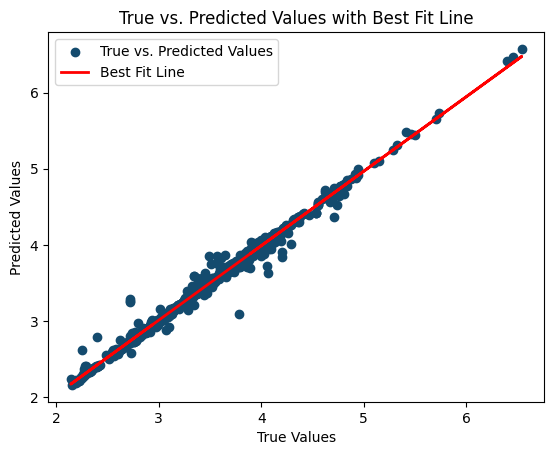

In [21]:
# Fit a linear regression model to the true vs. predicted values
regression_line = LinearRegression()
regression_line.fit(y_test.values.reshape(-1, 1), y_pred_random_forest)

y_line_pred = regression_line.predict(y_test.values.reshape(-1, 1))

# Plot the scatter plot
plt.scatter(y_test, y_pred_random_forest, color="#144b6e", label='True vs. Predicted Values')

# Plot the regression line
plt.plot(y_test, y_line_pred, color='red', linewidth=2, label='Best Fit Line')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values with Best Fit Line')
plt.legend()
plt.show()

## 5. Implementation using Neural Networks

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)




Epoch 1/50

138/138 [==============================] - 3s 6ms/step - loss: 12.1127 - val_loss: 11.4821
Epoch 2/50
138/138 [==============================] - 1s 4ms/step - loss: 11.1818 - val_loss: 10.6071
Epoch 3/50
138/138 [==============================] - 1s 5ms/step - loss: 10.3287 - val_loss: 9.7832
Epoch 4/50
138/138 [==============================] - 1s 5ms/step - loss: 9.5266 - val_loss: 9.0086
Epoch 5/50
138/138 [==============================] - 1s 5ms/step - loss: 8.7735 - val_loss: 8.2821
Epoch 6/50
138/138 [==============================] - 1s 4ms/step - loss: 8.0669 - val_loss: 7.6011
Epoch 7/50
138/138 [==============================] - 1s 5ms/step - loss: 7.4045 - val_loss: 6.9629
Epoch 8/50
138/138 [==============================] - 1s 4ms/step - loss: 6.7845 - val_loss: 6.3653
Epoch 9/50
138/138 [==============================] - 1s 4ms/step - loss: 6.2043 - val_loss: 5.8082
Epoch 10/50
138/138 [==============================] - 1s 4ms/step - loss: 5.6632 - val_los

In [23]:
# Make predictions on the test set
y_pred_nn = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Mean Squared Error (Neural Network): {mse_nn}')

35/35 [==============================] - 0s 3ms/step
Mean Squared Error (Neural Network): 0.3983905481268296


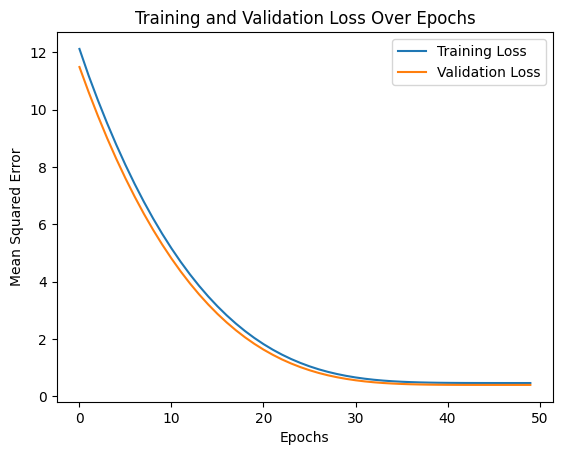

In [24]:
# Visualize training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [25]:
# Make predictions on the test set
X_test_scaled = scaler.transform(X_test)
y_pred_test = model.predict(X_test_scaled).flatten()

# Display the predicted values
print("Predicted Depression (%) for the test set:")
print(y_pred_test)

35/35 [==============================] - 0s 3ms/step
Predicted Depression (%) for the test set:
[3.4740648 3.4740648 3.4740648 ... 3.4740648 3.4740648 3.4740648]


---
## Conclusion
This analysis of global mental health trends revealed several key insights. We observed variations in the prevalence of mental disorders across different countries, with visualizations highlighting potential geographical disparities. The correlation matrix indicated moderate positive correlations between some disorders, suggesting possible underlying factors influencing their co-occurrence. Predictive modeling, using a Random Forest Regressor, demonstrated potential for estimating depression prevalence based on other mental health indicators, offering possibilities for further exploration and tailored interventions. Overall, this multifaceted approach contributes to a broader understanding of global mental health disparities and paves the way for further research and potentially more effective strategies to address these critical issues.